### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [16]:
diff = []
for i in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diff.append(mean_coff - mean_nocoff)

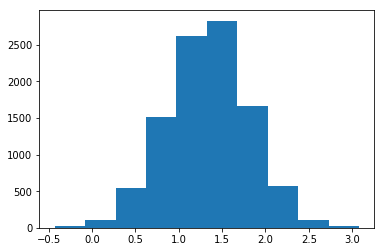

In [17]:
plt.hist(diff);

In [18]:
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(0.10258900080919674, 2.5388333707966284)

In [19]:
mean_coff - mean_nocoff

1.7964060674083555

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [21]:
diff_age = []
for i in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    over21 = bootsample[bootsample['age'] != '<21']['height'].mean()
    under21 = bootsample[bootsample['age'] == '<21']['height'].mean()
    diff_age.append(over21 - under21)
    


(3.3667113781707676, 5.1321276562621989)

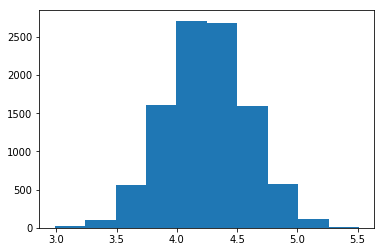

In [22]:
plt.hist(diff_age);

In [23]:
over21 - under21

4.3690822507617924

In [24]:
np.percentile(diff_age, 0.5), np.percentile(diff_age, 99.5)

(3.3667113781707676, 5.1321276562621989)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [52]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_under21.append(under21_coff_mean - under21_nocoff_mean)
    
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller


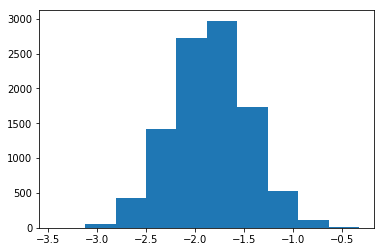

In [53]:
plt.hist(diffs_coff_under21);

In [54]:
under21_coff_mean - under21_nocoff_mean

-1.6312076478012543

In [55]:
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)

(-2.629742610577515, -1.0695811597497988)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [56]:
diffs_coff_over21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    over21_coff_mean = bootsamp.query("age != '<21' and drinks_coffee == True")['height'].mean()
    over21_nocoff_mean = bootsamp.query("age != '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_over21.append(over21_coff_mean - over21_nocoff_mean)
    

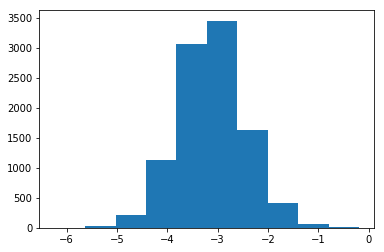

In [57]:
plt.hist(diffs_coff_over21);

In [58]:
over21_coff_mean - over21_nocoff_mean

-3.8002110422937676

In [59]:
np.percentile(diffs_coff_over21, 2.5), np.percentile(diffs_coff_over21, 97.5)

(-4.4122802237381817, -1.8031043160001676)